# Single Layer Neural Network
A single-layer neural network, also known as a perceptron, is the simplest type of artificial neural network. It consists of a single layer of output nodes connected directly to a layer of input nodes. This type of network is foundational in the field of machine learning and neural networks.


In [1855]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
rs = 31 #random state 


### Data Preparation

In [1856]:
# Retriving the data from file
df = pd.read_csv('Q2_Final.csv')
df.head()

,X,Y
0,0.0,-5.293264
1,0.1,-2.463141
2,0.2,-7.131471
3,0.3,-2.610196
4,0.4,-8.854136


In [1857]:
# Seperating X and Y values
X = df.iloc[:, :1].values
y = df.iloc[:, 1:].values

print(X[0:5])
print(y[0:5])

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]]
[[-5.29326439]
 [-2.46314058]
 [-7.13147139]
 [-2.610196  ]
 [-8.85413581]]


### Data Visualization

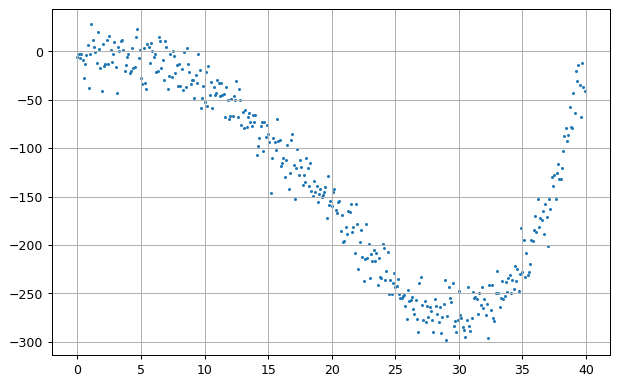

In [1858]:
plt.figure(figsize = (8, 5), dpi = 90)
plt.scatter(X, y, s = 2)
plt.grid()
plt.show()

### Single Layer NN

After the data has been split inton train and test portions, we can train our model on `X_train` and evaluate the result with `y_train`. The features (input size) depends on the degree of the polynomial; if set to 1 the input layer consists of 2 neurons, one bias and one X value, if set to 2 the input layer consists of 3 neurons namely bias, $x$ value, and $x^2$, if set to 3 the input layer consists of 4 neurons namely bias, $x$ value, $x^2$, and $x^3$ and so on.

#### Using Linear Regression in a Single Layer Neural Network

Linear regression can be viewed as a special case of a single-layer neural network. In this context, the neural network consists of an input layer and an output layer, with no hidden layers. The goal is to predict a continuous output variable based on one or more input features.

#### Structure of the Network

1. **Input Layer**:
   - Each neuron in the input layer corresponds to one feature of the input data.
   - For a dataset with $n$ features, there will be $n$ input neurons.

2. **Output Layer**:
   - There is a single neuron in the output layer that produces the predicted continuous value.

3. **Weights and Biases**:
   - Each input neuron is connected to the output neuron with an associated weight.
   - The output neuron also has a bias term.

#### Mathematical Representation

In a single-layer neural network used for linear regression, the output $y$ is computed as a weighted sum of the input features plus a bias term. Mathematically, this can be represented as:

$$y = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b$$

where:
- $x_1, x_2, \ldots, x_n$ are the input features.
- $w_1, w_2, \ldots, w_n$ are the weights associated with each input feature.
- $b$ is the bias term.

#### Activation Function

For linear regression, the activation function is typically the identity function, meaning the output is directly the weighted sum of the inputs plus the bias:

$$\text{Output} = y$$

#### Training Process

The training process involves finding the optimal weights and bias that minimize the error between the predicted output and the actual output. This is typically done using gradient descent. The steps are:

1. **Initialization**: Initialize the weights and bias randomly.
2. **Forward Propagation**: Compute the predicted output using the current weights and bias.
3. **Loss Calculation**: Calculate the loss (error) using a loss function, typically the Mean Squared Error (MSE):
   $$\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$
   where $m$ is the number of training examples, $y_i$ is the actual output, and $\hat{y}_i$ is the predicted output.
4. **Backward Propagation**: Compute the gradient of the loss with respect to each weight and bias.
5. **Weight Update**: Adjust the weights and bias in the direction that reduces the loss:
   $$w_j = w_j - \alpha \frac{\partial \text{MSE}}{\partial w_j}$$
   $$b = b - \alpha \frac{\partial \text{MSE}}{\partial b}$$
   where $\alpha$ is the learning rate.
6. **Iteration**: Repeat the process for a number of iterations or until the loss converges to a minimum value.


In [1859]:
def SLNN(X_train, X_test, y_train, y_test, ratio, draw_plot=True, reg=False):
    mse_train_history = []
    mse_test_history = []
    degrees = [1, 2, 3, 4, 10, 15, 20, 25]
    if draw_plot:
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle(f'test-train split ratio: {ratio}')
        ax_n = 0
    # Train and evaluate models
    for degree in range(1, 26):
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Train model
        if reg:
            model = Lasso(max_iter=100000)
        else:
            model = LinearRegression()
        
        model.fit(X_train_poly, y_train)

        # Evaluate on train and test sets
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        print(f'Degree: {degree} - Train MSE: {train_mse} - Test MSE: {test_mse}')
        mse_test_history.append(test_mse)
        mse_train_history.append(train_mse)

        if draw_plot:
            # Plot predictions
            # Sort x_test and y_pred
            if degree in degrees:
                ax = axes[ax_n//4, ax_n%4]
                sorted_indices = np.argsort(X_test, axis=0).flatten()
                X_test_sorted = X_test[sorted_indices]
                y_pred_sorted = y_test_pred[sorted_indices]

                ax.scatter(X_test, y_test, label='Data', s=10, c='red')
                ax.plot(X_test_sorted, y_pred_sorted, label=f'Degree {degree}')
                ax.legend()
                ax.set_title(f'Degree {degree}')
                ax.grid()
                ax_n += 1
    return mse_train_history, mse_test_history
        

In [1860]:
# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rs)
y_train = y_train.ravel()
y_test = y_test.ravel()
print(f'Data length: {len(X)} - Train data length: {len(X_train)} - Test data length: {len(X_test)}')

Data length: 400 - Train data length: 360 - Test data length: 40


Degree: 1 - Train MSE: 4355.496082056002 - Test MSE: 3714.2302864219805
Degree: 2 - Train MSE: 2752.4455196409585 - Test MSE: 2180.936703665451
Degree: 3 - Train MSE: 374.55116912315395 - Test MSE: 483.9048927222226
Degree: 4 - Train MSE: 240.71872717307755 - Test MSE: 268.9625860488873
Degree: 5 - Train MSE: 240.63801148042901 - Test MSE: 271.52771242448324
Degree: 6 - Train MSE: 239.34200553995075 - Test MSE: 277.34389017158253
Degree: 7 - Train MSE: 239.33398418674807 - Test MSE: 277.0783613371374
Degree: 8 - Train MSE: 238.25489910001326 - Test MSE: 276.4876266333513
Degree: 9 - Train MSE: 238.10540124038056 - Test MSE: 274.23678719349965
Degree: 10 - Train MSE: 235.33760763850265 - Test MSE: 266.59296228287593
Degree: 11 - Train MSE: 231.72671630678462 - Test MSE: 265.0881668292193
Degree: 12 - Train MSE: 230.81074140782997 - Test MSE: 269.48771289827545
Degree: 13 - Train MSE: 241.90786746412653 - Test MSE: 296.2326555947003
Degree: 14 - Train MSE: 272.07493963036677 - Test MSE: 

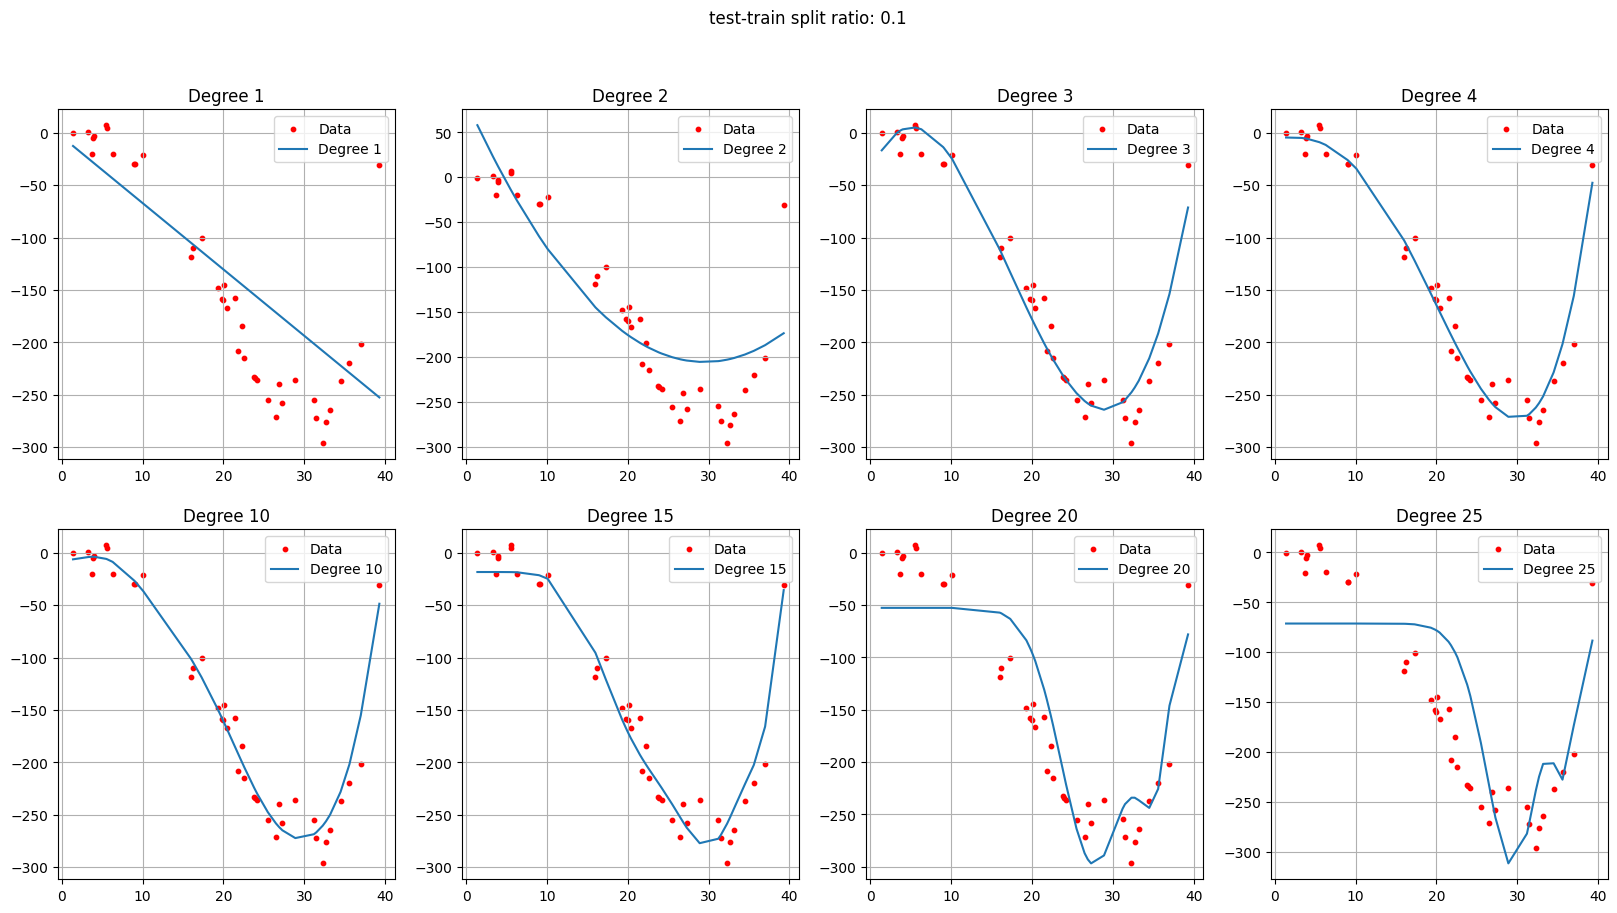

In [1861]:
mse_train_history, mse_test_history = SLNN(X_train, X_test, y_train, y_test, 0.1)

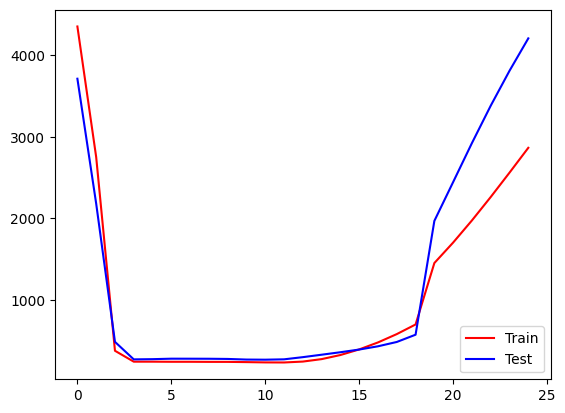

In [1862]:
plt.plot(range(len(mse_train_history)), mse_train_history, c='red', label='Train')
plt.plot(range(len(mse_test_history)), mse_test_history, c='blue', label='Test')
plt.legend()
plt.show()

### Overfitting

Overfitting occurs when a model learns not only the underlying pattern in the training data but also the noise and fluctuations. This results in a model that performs well on the training data but poorly on unseen data. A model that is overfitting will have a prediction line that is overly complex and wavy, trying to pass through as many data points as possible. This complexity indicates that the model is capturing noise rather than the true underlying pattern. 

In a well-fitted model, the MSE should decrease or stabilize as the model complexity increases. An increasing MSE with higher complexity indicates that the model is not generalizing well to new data, a hallmark of overfitting. In addition, overfitting occurs when a model learns the training data too well, including its noise and outliers, leading to poor generalization to new, unseen data. This can be identified by comparing the MSE values for training and test datasets. If the MSE on the test data is significantly higher than the training MSE, it suggests that the model is not generalizing well to new data and is likely overfitting.

Viewing the graphs above indicates the overfitting process as the degree (features/number of input neurons) increases, particularly when it exceeds 10.
1. **Prediction Line Behavior**:
   - As the degree (number of features/input neurons) increases, the prediction line becomes more complex and starts to fit the noise in the training data rather than the overall trend.
   - This is evident from the prediction line missing the general trend of the data points, indicating that the model is too tailored to the training data specifics.

2. **Mean Squared Error (MSE) Trend**:
   - The MSE graph shows an upward trend when the number of input neurons exceeds 10.
   - This increase in MSE suggests that the model's performance on the validation or test data is deteriorating as it becomes more complex, further confirming overfitting.
   - Initially, as the model complexity increases, the test data MSE may decrease, indicating better generalization.
   - Beyond a certain point, The test data MSE tends to become significantly higher than training data MSE as the complexity of the model increases.

### Train-Test Split

We see the difference between the MSE on the training set and the test set increases, with the MSE on the test set being significantly higher than on the training set as the ratio of test/train increases. This effect is less pronounced for models of degree 3-5 and more significant for models of degree greater than 10.
- Higher-degree models (degree > 10) tend to overfit the training data. As the test set size increases, the model's inability to generalize becomes more apparent, leading to a higher MSE on the test set compared to the training set.
- Models with higher degrees are more complex and can capture more intricate patterns in the training data. However, this complexity often leads to poor generalization on unseen data (test set), resulting in a larger discrepancy between training and test MSE.
- Lower-degree models (degree 3-5) strike a better balance between bias and variance. They are less likely to overfit the training data and can generalize better to the test set. This results in a smaller difference between the training and test MSE. Higher-degree models, on the other hand, have high variance and low bias, leading to significant overfitting and a larger difference in MSE.

Data length: 400 - Train data length: 360 - Test data length: 40
Degree: 1 - Train MSE: 4355.496082056002 - Test MSE: 3714.2302864219805
Degree: 2 - Train MSE: 2752.4455196409585 - Test MSE: 2180.936703665451
Degree: 3 - Train MSE: 374.55116912315395 - Test MSE: 483.9048927222226
Degree: 4 - Train MSE: 240.71872717307755 - Test MSE: 268.9625860488873
Degree: 5 - Train MSE: 240.63801148042901 - Test MSE: 271.52771242448324
Degree: 6 - Train MSE: 239.34200553995075 - Test MSE: 277.34389017158253
Degree: 7 - Train MSE: 239.33398418674807 - Test MSE: 277.0783613371374
Degree: 8 - Train MSE: 238.25489910001326 - Test MSE: 276.4876266333513
Degree: 9 - Train MSE: 238.10540124038056 - Test MSE: 274.23678719349965
Degree: 10 - Train MSE: 235.33760763850265 - Test MSE: 266.59296228287593
Degree: 11 - Train MSE: 231.72671630678462 - Test MSE: 265.0881668292193
Degree: 12 - Train MSE: 230.81074140782997 - Test MSE: 269.48771289827545
Degree: 13 - Train MSE: 241.90786746412653 - Test MSE: 296.2326

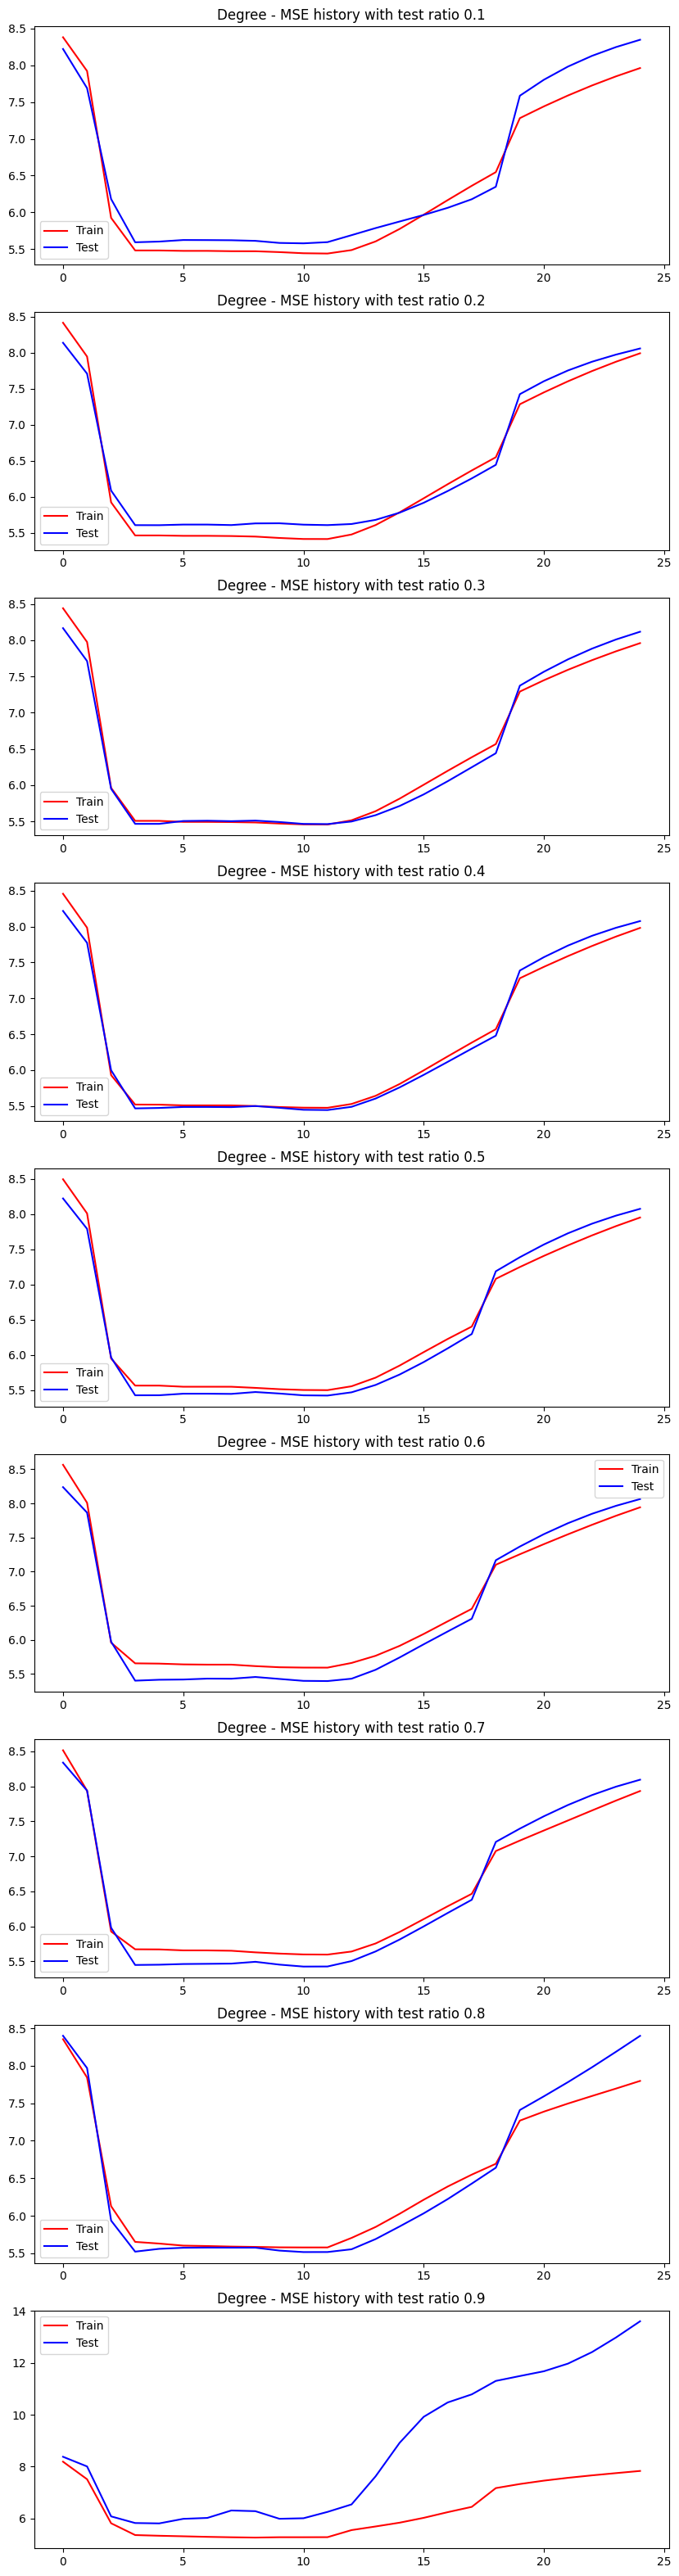

In [1863]:
fig, axes = plt.subplots(9, 1, figsize=(10, 40))

ax_n = 0
deg4_train_history=[]
deg4_test_history=[]

for i in range(1, 10):
    ratio = i/10

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=rs)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    print(f'Data length: {len(X)} - Train data length: {len(X_train)} - Test data length: {len(X_test)}')   
    
    mse_train_history, mse_test_history = SLNN(X_train, X_test, y_train, y_test, ratio, draw_plot=False)
    
    # plt.plot(range(len(mse_train_history)), np.log(mse_train_history), label=f'{ratio}')
    # plt.legend()

    axes[ax_n].plot(range(len(mse_train_history)), np.log(mse_train_history), c='red', label='Train')
    axes[ax_n].plot(range(len(mse_test_history)), np.log(mse_test_history), c='blue', label='Test')
    axes[ax_n].set_title(f'Degree - MSE history with test ratio {ratio}')
    axes[ax_n].legend()
    ax_n += 1

    deg4_train_history.append(mse_train_history[3:10])
    deg4_test_history.append(mse_test_history[3:10])

plt.show()

Training Data MSE Trend:
- As the size of the training set decreases, the model has fewer examples to learn from. This typically leads to poorer performance on the training set because the model cannot capture the underlying patterns in the data effectively. This results in an increase in MSE.
- When the training data is drastically reduced to 20%, the model might become simpler. This simplification can sometimes lead to better performance on the training set because the model is less complex and can fit the limited data more effectively.

Test Data MSE Trend:
- As the test set size increases, the model is evaluated on a larger and more diverse set of data points. Initially, this can lead to a decrease in MSE because the model’s performance is averaged over more examples, which can smooth out anomalies and provide a more accurate measure of its generalization ability. Also, with a larger test set, the model’s performance is less likely to be influenced by overfitting to a small, potentially unrepresentative test set. This can result in a lower MSE as the model’s true performance is better reflected.
- When the training set is reduced to only 20% of the total data, the model has significantly fewer examples to learn from. This can severely limit its ability to capture the underlying patterns in the data, leading to poor generalization and higher MSE on the test set.
- With a very small training set, the model might not be able to learn complex relationships within the data. This can result in underfitting, where the model is too simple to capture the data’s complexity, leading to higher MSE on the test set.

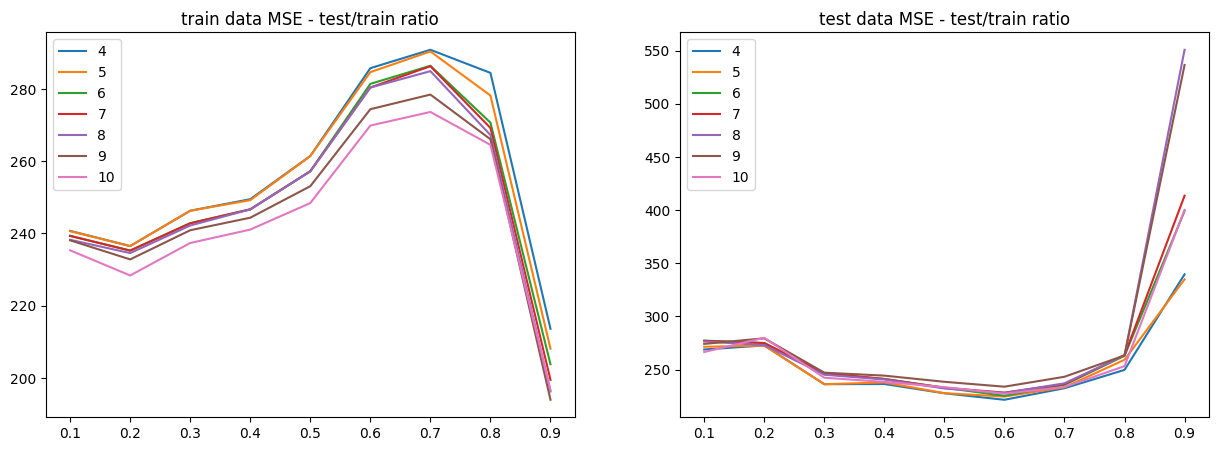

In [1864]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
tetr_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 , 0.9]
axes[0].plot(tetr_ratio, deg4_train_history, label=range(4, 11))
axes[0].set_title('train data MSE - test/train ratio')
axes[0].legend()
axes[1].plot(tetr_ratio, deg4_test_history, label=range(4, 11))
axes[1].set_title('test data MSE - test/train ratio')
axes[1].legend()

### Regularization

Regularization is a technique used to add a penalty to the loss function of a machine learning model. This penalty discourages the model from fitting the training data too closely, which can lead to overfitting. Overfitting occurs when a model learns the noise in the training data rather than the underlying pattern, resulting in poor performance on unseen data.

#### Types of Regularization

There are several types of regularization techniques, each with its own characteristics and use cases. The most common types are L1 regularization (Lasso), L2 regularization (Ridge), and Elastic Net, which combines both L1 and L2 regularization.

1. **L1 Regularization (Lasso)**:
   - **Definition**: L1 regularization adds the absolute value of the coefficients as a penalty term to the loss function.
   - **Mathematical Formulation**: The loss function for Lasso regression is:
     $$
     \text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_j|
     $$
     where $\lambda$ is the regularization parameter, $y_i$ is the actual value, $\hat{y}_i$ is the predicted value, and $w_j$ are the model coefficients.
   - **Characteristics**: Lasso can shrink some coefficients to exactly zero, effectively performing feature selection. It is useful when you have a large number of features and expect only a few to be important.

2. **L2 Regularization (Ridge)**:
   - **Definition**: L2 regularization adds the squared value of the coefficients as a penalty term to the loss function.
   - **Mathematical Formulation**: The loss function for Ridge regression is:
     $$
     \text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2
     $$
   - **Characteristics**: Ridge regression shrinks the coefficients but does not set any of them to zero. It is useful when you have multicollinearity in your data, as it can help to stabilize the estimates.

3. **Elastic Net**:
   - **Definition**: Elastic Net combines both L1 and L2 regularization penalties.
   - **Mathematical Formulation**: The loss function for Elastic Net is:
     $$
     \text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^{p} |w_j| + \lambda_2 \sum_{j=1}^{p} w_j^2
     $$
     where $\lambda_1$ and $\lambda_2$ are the regularization parameters for L1 and L2 penalties, respectively.
   - **Characteristics**: Elastic Net is useful when you have a large number of correlated features. It combines the benefits of both Lasso and Ridge, providing a more balanced approach to regularization.

#### Importance of Regularization

1. **Prevents Overfitting**: By adding a penalty to the loss function, regularization discourages the model from fitting the training data too closely, thus improving its performance on unseen data.

2. **Improves Generalization**: Regularization helps to create simpler models that generalize better to new data, reducing the risk of overfitting.

3. **Handles Multicollinearity**: In cases where features are highly correlated, regularization techniques like Ridge regression can help to stabilize the model estimates and reduce variance.

4. **Feature Selection**: Lasso regularization can perform feature selection by shrinking some coefficients to zero, making it easier to interpret the model and identify important features.

In [1865]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rs)
y_train = y_train.ravel()
y_test = y_test.ravel()
print(f'Data length: {len(X)} - Train data length: {len(X_train)} - Test data length: {len(X_test)}')

Data length: 400 - Train data length: 360 - Test data length: 40



#### Choice of Regularizarion Type

The degree 25 polynomial produces large values for the features, which can cause the Ridge regression (L2 regularization) with the term $w_j^2$ to generate very large values. The L2 penalty term in Ridge regression amplifies the effect of these large values, leading to very large coefficients that can make the model excessively sensitive to variations in the input data. This can negatively impact the model’s performance. Therefore, the Lasso (L1) regularization method has been chosen. This is why Lasso regularization, which uses an L1 penalty, is preferred in such cases. Lasso tends to shrink coefficients and can set some of them to zero, effectively performing feature selection and resulting in a more robust model.

As shown below, we encounter a ConvergenceWarning from the Lasso function in scikit-learn. This warning indicates that the optimization algorithm did not converge within the specified number of iterations. Although we can increase the number of iterations, it may be computationally expensive and time-consuming. Given that the model has already performed well even with a low number of iterations, we can safely ignore this warning.

Degree: 1 - Train MSE: 4355.503464167883 - Test MSE: 3716.9952757544206
Degree: 2 - Train MSE: 2752.5766521302176 - Test MSE: 2183.786079864517
Degree: 3 - Train MSE: 375.3474954636059 - Test MSE: 491.27222147871055
Degree: 4 - Train MSE: 240.9647771205606 - Test MSE: 266.47657786307144
Degree: 5 - Train MSE: 241.18845394899148 - Test MSE: 265.9192521351638


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.335e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 6 - Train MSE: 240.35238122492294 - Test MSE: 274.30181372689236
Degree: 7 - Train MSE: 240.123115646776 - Test MSE: 276.76398934241524


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.325e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 8 - Train MSE: 240.0971527327992 - Test MSE: 278.03691066492985


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.327e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 9 - Train MSE: 240.1176344127895 - Test MSE: 278.1428619199909


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 10 - Train MSE: 240.08755487290784 - Test MSE: 277.6790405221908


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.325e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 11 - Train MSE: 240.0645661766691 - Test MSE: 277.35587776338656


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.325e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 12 - Train MSE: 240.05256271774553 - Test MSE: 277.3182783817985


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.325e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 13 - Train MSE: 240.04304953569846 - Test MSE: 277.43749594888806


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 14 - Train MSE: 240.0416795849589 - Test MSE: 277.5878454525606


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 15 - Train MSE: 240.04464603174154 - Test MSE: 277.6605324334108


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 16 - Train MSE: 240.03674208910542 - Test MSE: 277.55876191431315


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.325e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 17 - Train MSE: 240.00280321058565 - Test MSE: 277.22340179724233


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.323e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 18 - Train MSE: 239.9357773330382 - Test MSE: 276.65102850610276


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.321e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 19 - Train MSE: 239.83497478237274 - Test MSE: 275.88686591775956


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.319e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 20 - Train MSE: 239.6988019863526 - Test MSE: 275.0008275001908


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.315e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 21 - Train MSE: 239.52055932586836 - Test MSE: 274.0631468734176


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.311e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 22 - Train MSE: 239.29097705921885 - Test MSE: 273.1304809222349


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.306e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 23 - Train MSE: 239.0042391443668 - Test MSE: 272.24319611472464


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.300e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 24 - Train MSE: 238.66241723693585 - Test MSE: 271.42848399817524


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.294e+04, tolerance: 3.522e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 25 - Train MSE: 238.27599371368868 - Test MSE: 270.70420966835775


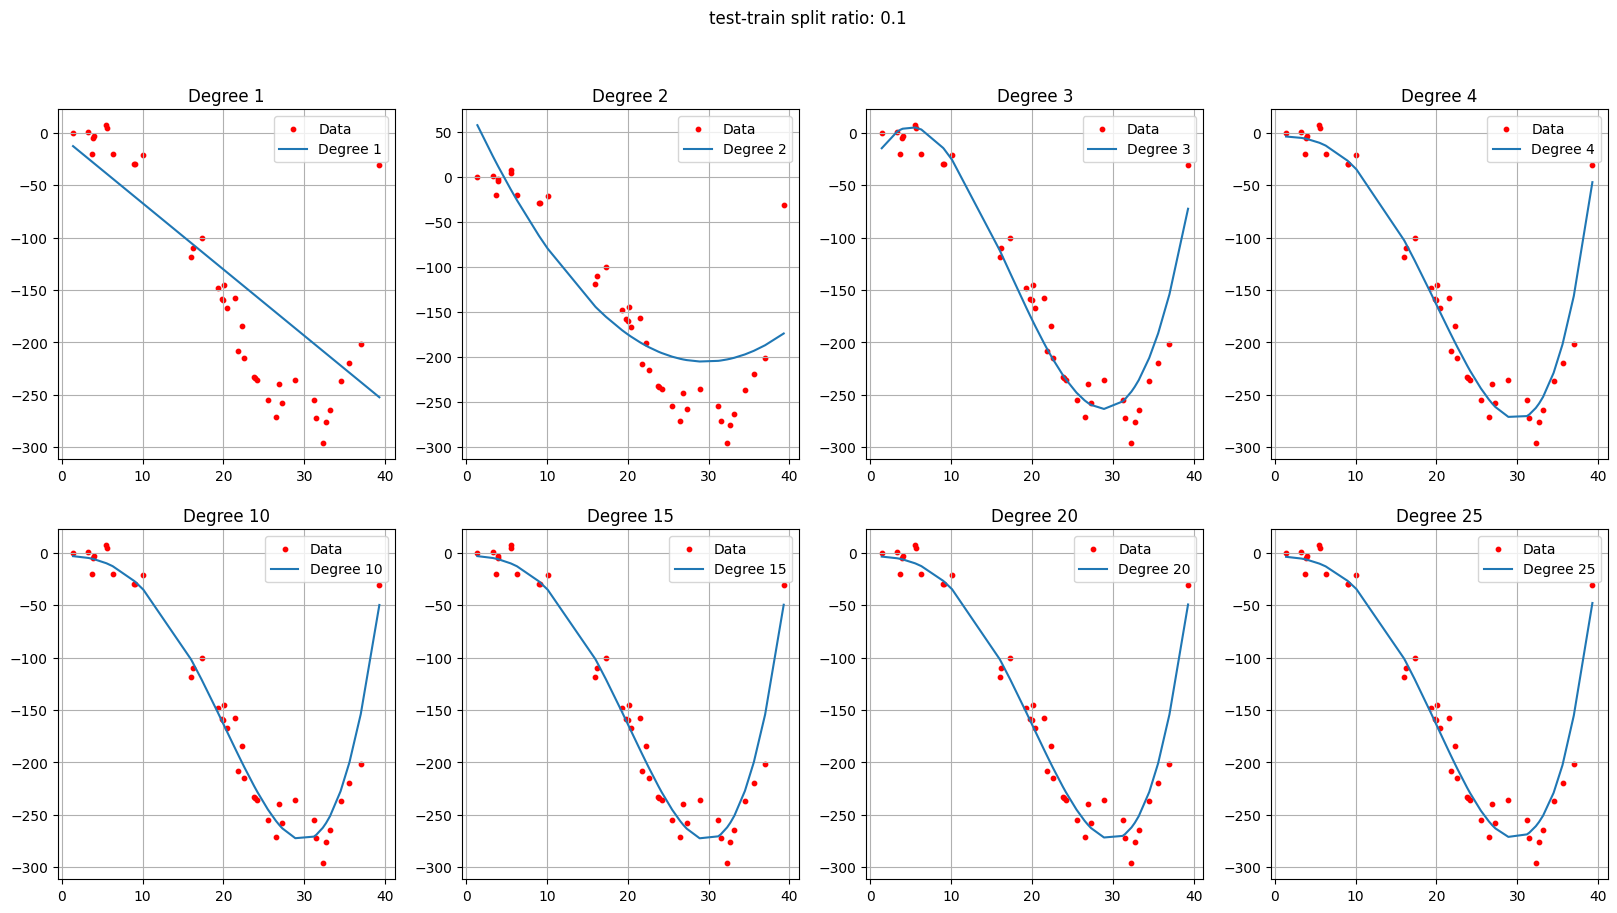

In [1866]:
mse_train_history_reg, mse_test_history_reg = SLNN(X_train, X_test, y_train, y_test, 0.1, True, True)

Degree: 1 - Train MSE: 4355.496082056002 - Test MSE: 3714.2302864219805
Degree: 2 - Train MSE: 2752.4455196409585 - Test MSE: 2180.936703665451
Degree: 3 - Train MSE: 374.55116912315395 - Test MSE: 483.9048927222226
Degree: 4 - Train MSE: 240.71872717307755 - Test MSE: 268.9625860488873
Degree: 5 - Train MSE: 240.63801148042901 - Test MSE: 271.52771242448324
Degree: 6 - Train MSE: 239.34200553995075 - Test MSE: 277.34389017158253
Degree: 7 - Train MSE: 239.33398418674807 - Test MSE: 277.0783613371374
Degree: 8 - Train MSE: 238.25489910001326 - Test MSE: 276.4876266333513
Degree: 9 - Train MSE: 238.10540124038056 - Test MSE: 274.23678719349965
Degree: 10 - Train MSE: 235.33760763850265 - Test MSE: 266.59296228287593
Degree: 11 - Train MSE: 231.72671630678462 - Test MSE: 265.0881668292193
Degree: 12 - Train MSE: 230.81074140782997 - Test MSE: 269.48771289827545
Degree: 13 - Train MSE: 241.90786746412653 - Test MSE: 296.2326555947003
Degree: 14 - Train MSE: 272.07493963036677 - Test MSE: 

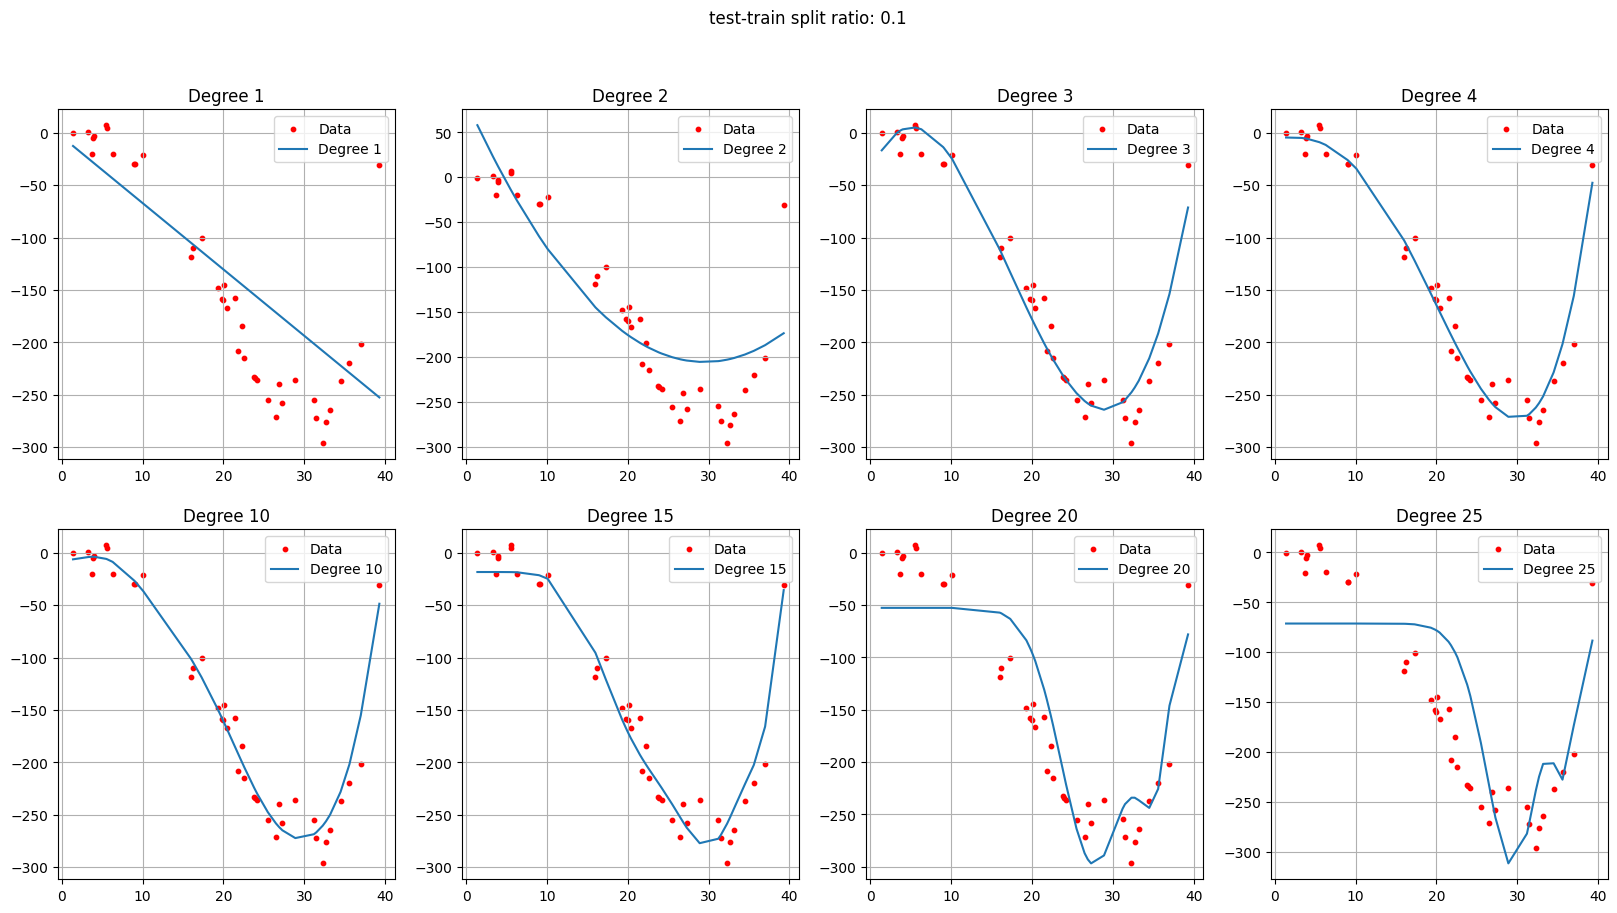

In [1867]:
mse_train_history, mse_test_history = SLNN(X_train, X_test, y_train, y_test, 0.1)

From the plots above, we can observe that even with high-degree polynomials, the model is able to generate a well-fitting prediction line using Lasso. In contrast, the model without regularization fails to capture the overall trend and produces a less accurate prediction line.

The primary reason for this observation is the effect of L1 regularization on the model’s coefficients. High-degree polynomials can create complex models with many features, leading to overfitting where the model captures noise in the training data rather than the underlying pattern. This results in a prediction line that misses the overall trend when no regularization is applied.

L1 regularization (Lasso) addresses this issue by adding a penalty to the absolute values of the coefficients. This penalty encourages the model to shrink some coefficients to zero, effectively reducing the model’s complexity and preventing overfitting. As a result, Lasso helps the model to focus on the most important features and capture the underlying trend more accurately, leading to a better-fitting prediction line even with high-degree polynomials.

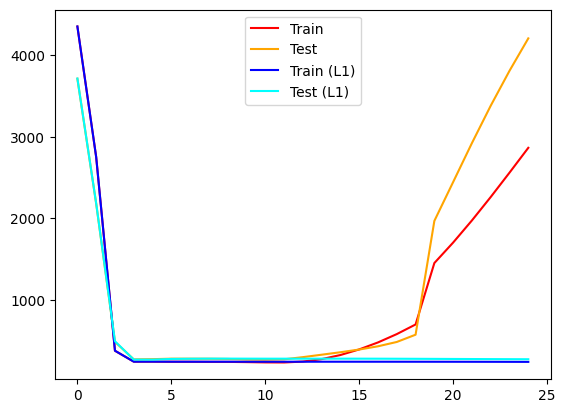

In [1868]:
plt.plot(range(len(mse_train_history)), mse_train_history, c='red', label='Train')
plt.plot(range(len(mse_test_history)), mse_test_history, c='orange', label='Test')
plt.plot(range(len(mse_train_history_reg)), mse_train_history_reg, c='blue', label='Train (L1)')
plt.plot(range(len(mse_test_history_reg)), mse_test_history_reg, c='cyan', label='Test (L1)')
plt.legend()
plt.show()

The above plot further confirm the explanations; By plotting the Mean Squared Error (MSE) for both the training and test datasets, we observe that the model without L1 regularization exhibits overfitting after a certain polynomial degree. In contrast, when L1 regularization is applied, the MSE for both the training and test datasets remains low, indicating better generalization.